> **By **: Soumia Zohra EL MESTARI

# Project: The movie database analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**The dataset** :  The Movie Database (TMDb) , this data set contains informations about 10,000 movies such as their ratings and revenues.  

> **Source ** : https://www.kaggle.com/tmdb/tmdb-movie-metadata  
>** columns description ** :
    - id & imdb : these values are identifiers ( we won't need them in our analysis )  
    - popularity : a metric that summarises the echo of the film (social media indicators (number  
    of likes on facebook for example ))
    - budget and revenue : these two are financial indicators and because these values can be   
    affected by the inflation over time two other columns were added budget_adj and revenue_adj   
    that were calculated  based on the 2010 dollars.  
    - the orginal title : movie title   
    - cast : this column contains the name of the actors who took roles in a given film   
    -keywords 
    - homepage : the film website URL   
    - Overview : contains a summary about the film story    
    - runtime   
    -genres : the different categories that the film belongs to 
    - Production companies   
    -release_date , release_year : two different format of release dates  
    - vote count and vote average : informations about users ratings   
    

> **Questions for this analysis** :  
1- what are the most popular kind of movies during this period ?  
2- How does the film revenue correlate with film's popularity ?  
3- How does the film revenue correlate with film's budget ?  
4- How does the general movies industury evolving throughout the years ?  indicators are the runtime , budget , revenue and popularity 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

 **1st step : Overview** : load the data in dataframe and display a small portion of them to see the nature of the data that we are working with 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
pd.options.display.max_columns = None # to display all the columns of the dataframe (otherwise we will display only a part of them)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**2nd Step: Identifying missing data and their impact** :  
1-Extract informations about the missing ( null ) values in each column. 

2- Identify the importance of the missing data:  

 2.1 - First thing to pay attention to is wether these data are crucial under 
 the scope of our analysis ; in other words will we need these informations in order to answer the questions we have , if yes we go into some method of handling missing data , otherwise we just drop the column entirely.  
 
 2.2 - if the data is crucial , then we should get the propotion of the missing values, if it's a very small propotion then we can just drop the rows that have these missing values (example : if we only have a propotion under 1% of the data are missing these values we can just drop these rows)  
 
 2.3 - If we can't drop these rows then we will be filling these missing data , there are many ways to do so , in this project i'll be using either the mean or the median and this depends on the distribution that i have ; if the distribution is dispersed I will use the median to fill the missing values because in this case the median will be more representative , in the other case ( non dispersed distribtion ) then the mean will be the value that i will use in order to handle missing data.

    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

=> Columns that have missing data are :  
* imdb_id , cast, homepage,tageline, keywords,Overview ,production_companies: These are not informations that we will be needing in this analysis so i will drop these columns.
* director,genres  : These two informations will be used to answer our questions so i will be handling the missing data for those two columns.  
* To avoid the inflation affect on the financial variables ( revenue and budget ) I will be using the adjusted values ( columns : budget_adj  and revenue_adj ) so the two columns  revenue and budget will not be used so i will drop them too .
* I will be using the vote_average only , so there is no need to keep the vote_count column.

### Data Cleaning 

In [3]:
# drop unecessary columns 
col_to_drop = ['id','imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','production_companies','vote_count']
df.drop(col_to_drop, axis = 1, inplace = True)
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()
# now i will calculates the percentage of the missing data for each column
missing_direc_per = (df[df['director'].isnull()].shape[0] / df.shape[0])*100
missing_genres_per = (df[df['genres'].isnull()].shape[0] / df.shape[0])*100
print('the percentage of the missing data for director column is {} %'.format(missing_direc_per))
print('the percentage of the missing data for genres column is {} %'.format(missing_genres_per ))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 849.0+ KB
the percentage of the missing data for director column is 0.40493281796429226 %
the percentage of the missing data for genres column is 0.21166942757224366 %


=> So as we can see the missing data in each column doesn't reach to 1% of the global distribution count so cutting of these rows won't affect our analysis in a dramatic way .

In [4]:
# now cutting of the rows with the missing data 
df = df[df['genres'].notnull()]
df = df[df['director'].notnull()]

**3rd Step : removing duplicate values if they exist ** 

In [5]:
duplicates_count = df.duplicated().sum()
print('the number of duplicates rows is {} '.format(duplicates_count))
# so there is one duplicate  we will be removing it 
df.drop_duplicates(inplace = True)
duplicates_count = df.duplicated().sum()
print('check the number of duplicates after removing them (to make sure we get rid of them ) {}'.format(duplicates_count))

the number of duplicates rows is 1 
check the number of duplicates after removing them (to make sure we get rid of them ) 0


**4th Step fix data format** :  
* 4.1  Popularity column contains values of float value => round these values to decimal places for a much clear values.  
* 4.2  The genres column contains multiple values for each row => split these values into multiple rows

In [25]:
#4.1 round the popularity values 
df['popularity'] = df['popularity'].round(2)
#4.2 split the genres column
cols = list(df.columns.values) # the columns that we have 
col_split = ['genres'] # the column that has many values (the one that we want to split its values)

def split_genres_per_row(row,cols,col_split ):
    """
    This function takes a row with a column that has multiple values and then split it into many rows 
    each one has one of the condense column values
    INPUT : 
        row : a DataFrame row (pandas.core.series.Series object ) to split into multiple rows
        cols : a list of our dataFrame column names (a list of strings )
        col_split : a list of the column that have multiple values ( a list of strings)
    OUTPUT : a DataFrame with all the splitted rows 
    """
    count_sep = row['genres'].count('|') #count the number of separators 
    nbr_genres = 0
    if (count_sep%2 == 0 ):
        nbr_genres = count_sep  #if we have an even number of seperators then we have count_sep genres (start couting from 0)
    else :
        nbr_genres = count_sep +1 #if we have an odd  number of seperators then we have count_sep +1 genres  (start couting from 0)
    
    splitted_values = row.genres.split('|')
    df1 = pd.DataFrame() # the result 
    to_copy = [] # each row has some values that are atomic and which will be copied in the splitted rows 
    
    for r in cols:
        to_copy.append(row[r])
    
    for i in range(nbr_genres  ):
        df2 = pd.DataFrame([to_copy],columns=cols)
        df2[col_split] = splitted_values[i]
        df1 = df1.append(df2)

    return df1

def split_rows_dataFrame(df,df_cols,col_split):
    """
    This function will loop over all the rows in the entire Dataframe and split each row that have 
    multiple values in columns into many rows , and then construct the new dataframe
    INPUT :
        df : The original dataFrame
        df_cols : a list of our dataFrame column names (a list of strings )
        col_split : a list of the column that have multiple values ( a list of strings)
    OUTPUT : The new DataFrame in which each column has an atomic value
    """
    result = pd.DataFrame()
    for index, row in df.iterrows():
        df1 = split_genres_per_row(row,cols ,col_split)
        result = result.append(df1)
    return result
new_df = split_rows_dataFrame(df,cols,col_split)

In [27]:
# This cell we are displaying the result ( first 6 rows ) just to show how our new dataframe look like 
new_df.head(6)
# this is just to save the new clean data set in a seperate file 
new_df.to_csv('clean_tmdb-movies.csv')

> **result** : Now  our data is clean , well formatted and ready to be analyzed 
=> for the new section we will be working with new_df dataFrame 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : what are the most popular kinds of movies during this period ? 

In [43]:
print(new_df.nunique())
new_df.describe()

popularity         476
original_title    8277
director          4125
runtime            226
genres              20
release_date      5168
vote_average        68
release_year        56
budget_adj        2300
revenue_adj       3972
dtype: int64


,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649469,102.189722,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,1.002471,30.783873,0.933006,12.819545,3.438403e+07,1.450182e+08
min,0.000000,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210000,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.390000,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720000,111.250000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,32.990000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> So we have 20 film genres over 56 years from 1960 to 2015

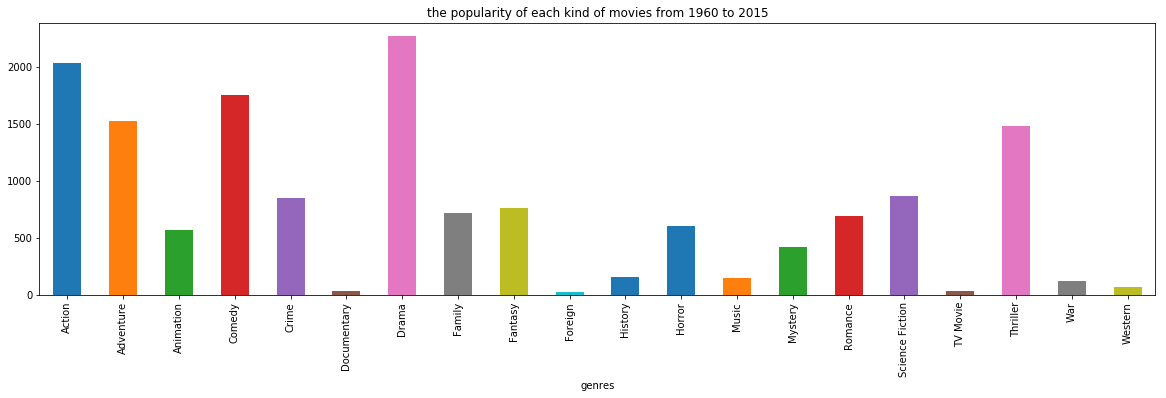

In [18]:
# The cleaning may take time so after it finishes make sure to run the following cell in order 
#to save the cleaned data and into a seperate file 'clean_tmdb-movies.csv'
# so that if  you do explore the work in two phases it will be easy to load them from the new file rather 
#than starting the cleaning again ( a supposition :D)
# if you want to check the plotig without running the cleaning part again uncomment the reading line below 
#new_df = pd.read_csv('clean_tmdb-movies.csv')

grouped = new_df.groupby(['genres'])
s = grouped['popularity'].aggregate(np.sum)

s.plot(kind='bar',figsize=(20,5),title='the popularity of each kind of movies from 1960 to 2015');

> So we can clearly see that the top three popular movie genres are : Drama , Action And Comedy 
 => Seems like this population(the persons who watch these movies ) prefer to see realistic exiting events that a normal life may miss, not everyone gets to be an impossible mission everyday.

### Research Question 2 : How does the film revenue correlate with film's popularity ?  

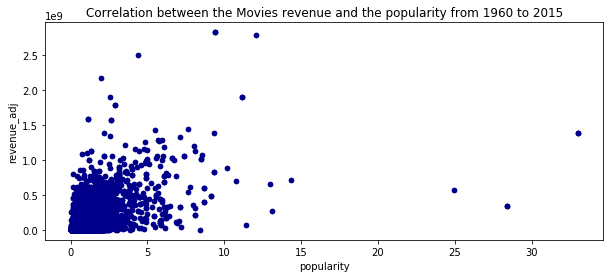

In [33]:
new_df.plot.scatter(x='popularity',
                y='revenue_adj',
                c='DarkBlue',
                title= 'Correlation between the Movies revenue and the popularity from 1960 to 2015',
                figsize=(10,4)
                    
               );

> In general we can say that there is a positive correlation between the popularity and the revenue of films

### Research Question 3 : How does the film revenue correlate with film's budget ?

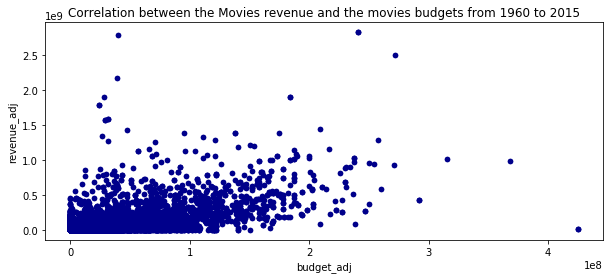

In [35]:
new_df.plot.scatter(x='budget_adj',
                y='revenue_adj',
                c='DarkBlue',
                title= 'Correlation between the Movies revenue and the movies budgets from 1960 to 2015',
                figsize=(10,4)
                    
               );

> The high revenue is not necessary correlated with the high budget for this sample 

### Research Question 4 : How does the general movies industury evolving throughout the years ?

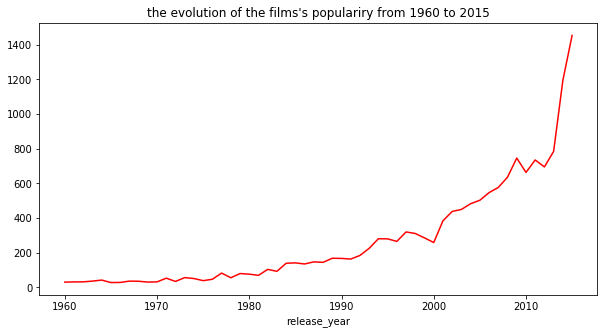

In [61]:
#It is to note that i didn't put all the indicators in one graph for two reasons:
#reason 1 : the range values of each indicator is different than the rest 
            #besides scaling all of them will not reflect any sense
#reason 2 : to provide clean and clear visualizations
popularity_indicator = new_df.groupby(['release_year'])['popularity'].sum()
popularity_indicator.plot(figsize=(10,5), 
                      y='popularity',
                      title ='the evolution of the films\'s populariry from 1960 to 2015',
                      color='red');


> The films became more popular as an entertainment tool since 2000 this can be due to the availability of TVs in each home and the evolution of the movies industry in general( better image quality....)

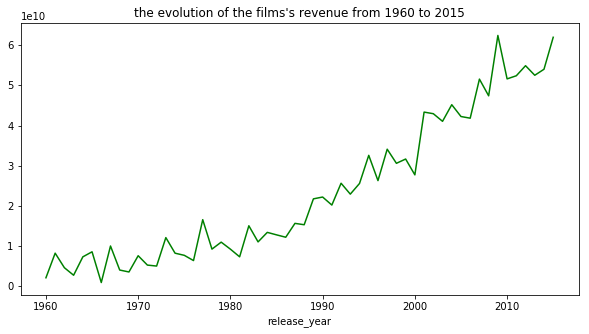

In [62]:
revenue_indicator =new_df.groupby(['release_year'])['revenue_adj'].sum()
revenue_indicator.plot(figsize=(10,5), 
                      title ='the evolution of the films\'s revenue from 1960 to 2015',
                      color = 'green');


> Since the popularity of films increased , having an increase in the films revenue is not surprising 

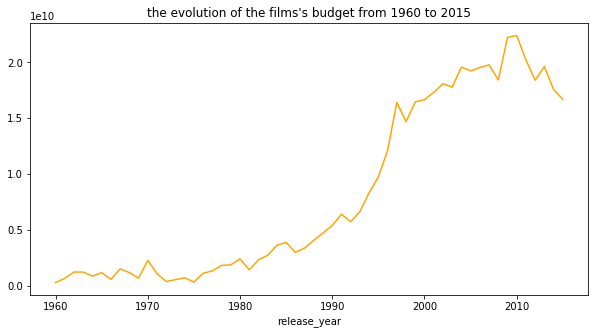

In [72]:
revenue_indicator =new_df.groupby(['release_year'])['budget_adj'].sum()
revenue_indicator.plot(figsize=(10,5), 
                      title ='the evolution of the films\'s budget from 1960 to 2015',
                      color='orange');


> since the 1990s we use more sophisticated tools in the movies production the raise in the budget levels is normal 
however the remarkable decrease in budgets in 2010.

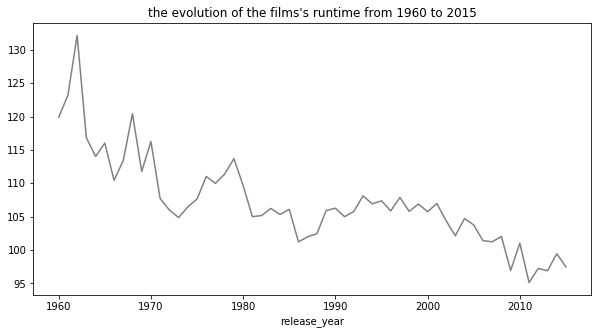

In [71]:
runtime_indicator =new_df.groupby(['release_year'])['runtime'].mean() # i used the mean because we need to see in each year how long were the films in average
runtime_indicator.plot(figsize=(10,5), 
                      title ='the evolution of the films\'s runtime from 1960 to 2015',
                      color='grey');


> People became more busy and life is following a fast rate so there is no wonder that the films will have short runtimes.

<a id='conclusions'></a>
## Conclusions

> **Summary**:   
since 1960 to 2015 movie industry became a principal player in the entertainment field with movies getting more popular , recording more revenues and demanding larger budgets.  
Without forgetting the adaption to the customer lifestyle evolution because during years people became more busy and films should get shorter in order not lose its spectators.
>So making a high budget film with a short runtime may be a good deal ,but under the scope of this analysis such a conclusion can't be affirmed .<br>  
>**Why?(limitations)** : <br>
This conclusion can't be affirmed because :  
1- The data that we have is a sample and not the whole population and this is an observational study , so we can't draw conclusions neither preditions on the population.  
2- "Correlation Doesn't prove causation " bacause we have some correlations between variables , this can't prove that a change in one of them cause the others to change in a certain way. <br>
3- The rating and the popularity of films are indicators that can be affected by many extranious factors such us the change in the people's culture , beliefs , society..... So the people who rated the films in 1960 are from another world compared with the generation of 2000.